# Section A: Robotic Vacuum Supervisory Control

#### Task 1.

Add four states to your model: Off, Vacuum, SeekDock and Charge, with Off as the default state.
 
Note: When you run or submit this model, a MATLAB figure window will appear showing the robot and dock positions in the simulated room. Once you connect Stateflow and Simulink in the last task, this figure will animate, showing you the simulated robot vacuum movement.

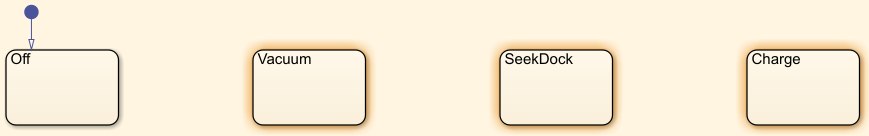

#### Task 2.

When the user sets the robot to off, vacuum, or dock, this is processed as a numerical signal, _requestMode_. _requestMode_ has the corresponding values shown.
 
- -1 – off
- 1 – dock
- 2 – vacuum
 
The user can
- Request _Off_ from either _Vacuum_ or _SeekDock_,
- Request either _Vacuum_, or _SeekDock_ from _Off_ and,
- Request _SeekDock_ from _Vacuum_.

Create the appropriate transitions and add conditions that describe how to transition between the _Off_, _Vacuum_ and _SeekDock_ states based on the user input.
 
For example, the machine should transition from _Off_ to _Vacuum_ if requestMode == 2.
 
Use the Symbols Pane to __Resolve undefined symbols__ and define _requestMode_ as Input Data.

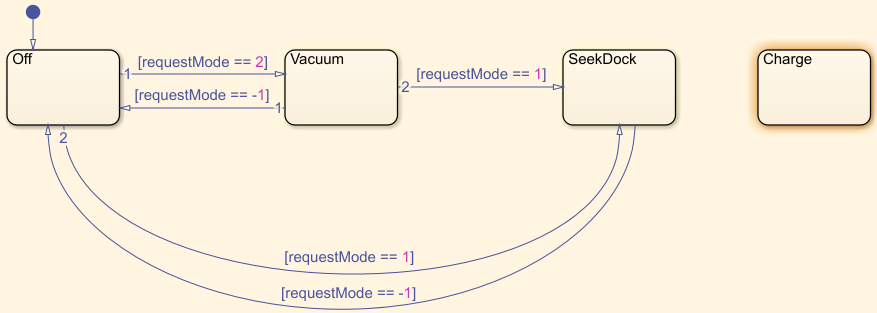

#### Task 3.

The user input is stored as _requestMode_. However, the Simulink subsystem that describes the dynamics needs the current operating mode. (The current mode can differ from the user request if, for example, the battery is too low to continue vacuuming.) Thus, you will set the value of an Output Data symbol using state _entry_ actions.

Add state _entry_ actions to each of the states to set a Symbol, _driveMode_, as described below.
 
Off/Charge driveMode = 0; <br>
SeekDock driveMode = 1; <br>
Vacuum driveMode = 2; <br>
 
Define _driveMode_ as Output Data.

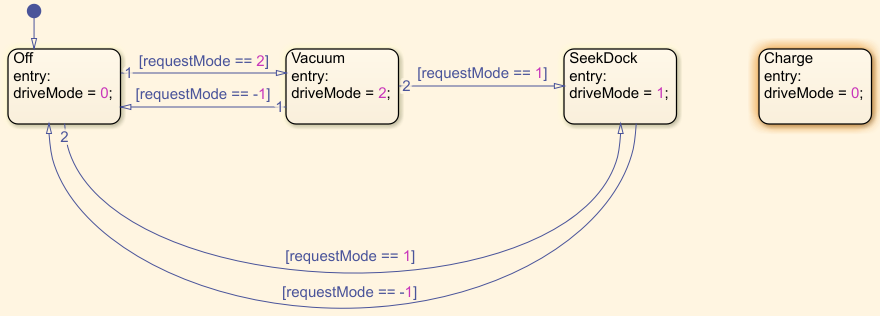

#### Task 4.

In addition to the user requested modes, the robot will also automatically change modes when the given task is complete. Simulink sends a "complete" flag when the physical model of the robot has finished vacuuming or found the dock.

Add the condition complete == 1 to transition from _Vacuum_ to _SeekDock_ and from _SeekDock_ to _Charge_. You will need to add a new transition from _SeekDock_ to _Charge_.
 
Define complete as Input Data.

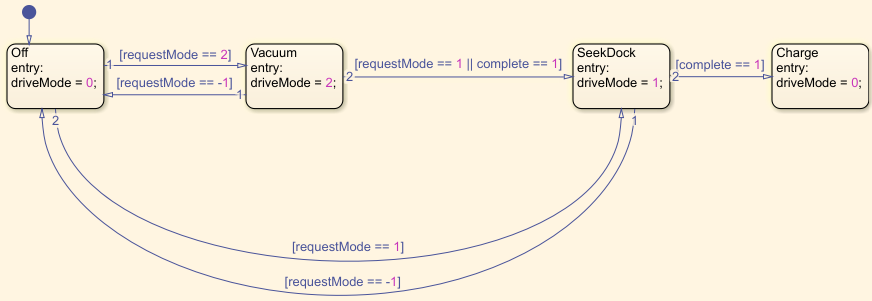

#### Task 5.

The battery drains whenever the robot is driving. This includes the _Vacuum_ and _SeekDock_ states. In the _Charge_ state, the battery charges.
 
For this project, you will use a naïve model of linear battery drain and charge and account for the state of charge (SOC) using Local Data.

Add the following _during_ actions to the appropriate states to model the battery state.
 
Battery drain: SOC = SOC - 1e-5; <br>
Battery charge: SOC = SOC + 2e-5;
 
Define _SOC_ as Local Data. Assign it an initial value of 100 (percent).

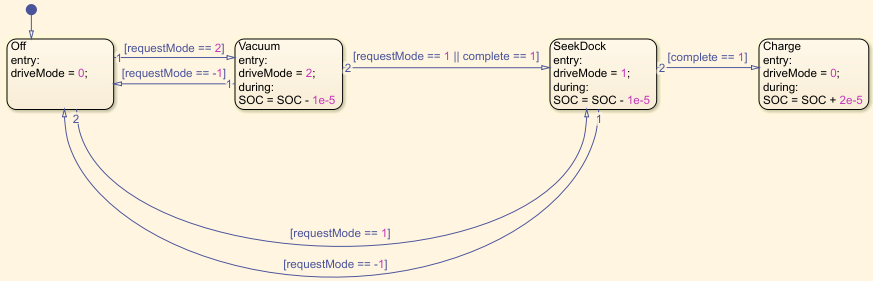

#### Task 6.

The status of the battery also affects the robot's behavior.
 
First, the robot automatically begins seeking the dock if the battery drops below 30% charge while vacuuming.
 
Second, charging is considered complete when the battery is 97% full. When charging is complete, the robot turns off.

Add the following conditions to the appropriate transitions (you will need to both create new and modify existing transitions).
 
Battery is less than 30% full: SOC < 30. <br>
Charging is complete: SOC >= 97. <br>

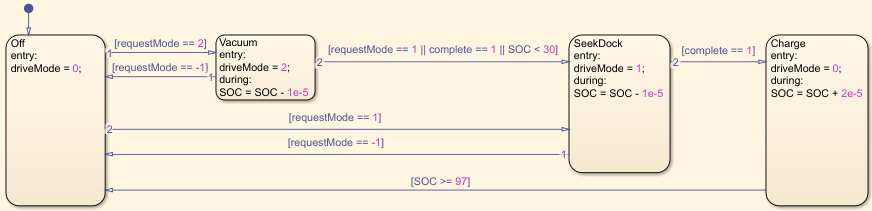

#### Task 7.

The final step is to integrate your logic with the Simulink model of the robot behavior.

Navigate to the Simulink model and connect the signals to their appropriate ports.

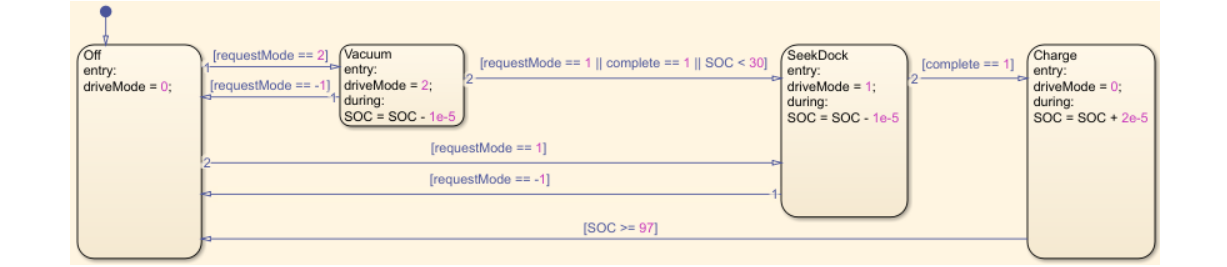

# Section B: Robotic Vacuum Driving Modes

#### Task 8.

The driving behavior can be captured by three states: drive to a specified location, drive randomly, and stop.

Create the states _DriveToLocation_, _RandomDrive_, and _TaskComplete_. Designate _DriveToLocation_ as the default state.

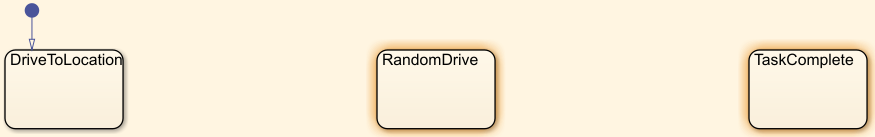

#### Task 9.

Although there are three internal states to this system, there are only two overall drive modes. <br>
1. Drive to the dock. <br>
2. Drive to the center of the room, then begin the random pattern.
 
The mode is set by a chart input, _driveMode_. In both behaviors, the first step is to drive to a specified location. Thus, both drive modes first enter the _DriveToLocation_ state. Then, if driveMode == 1, the task is complete. If driveMode == 2, begin the random drive.
 
The system can leave the _DriveToLocation_ state when positionReached == 1.

1. Add transitions from _DriveToLocation_ to _RandomDrive_ and to _TaskComplete_. Using the variables _positionReached_ and _driveMode_, add the necessary conditions to implement the behavior described above. <br>
2. Add a state _entry_ action to initialize the value of _positionReached_ to 0.

Set the Data scope of _positionReached_ to Local Data. _driveMode_ is a user input, so its scope should be Input Data.

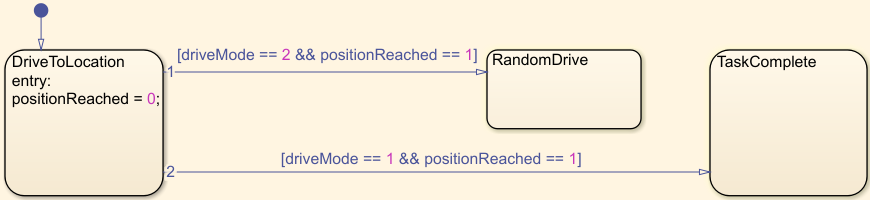

#### Task 10.

The random vacuum task consists of driving until bumping into a wall, rotating a random amount, and repeating the bump/rotate sequence. The task is complete after the bump sensor registers more than 50 times.

Add the appropriate transition and condition based on a counter, _bumpCount_. Set _bumpCount_ to 0 upon entering the _RandomDrive_ state.
 
Define the Symbol as Local Data.

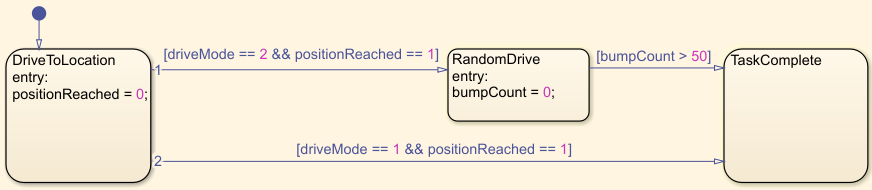

#### Task 11.

The "drive to location" behavior occurs in three steps, in the following order: pure rotation to the correct orientation, pure translation to the correct location, and then stop.

Create the states _PureRotate_, _PureTranslate_, and _Stop_ as substates of _DriveToLocation_. Add the transitions to implement the described sequence.

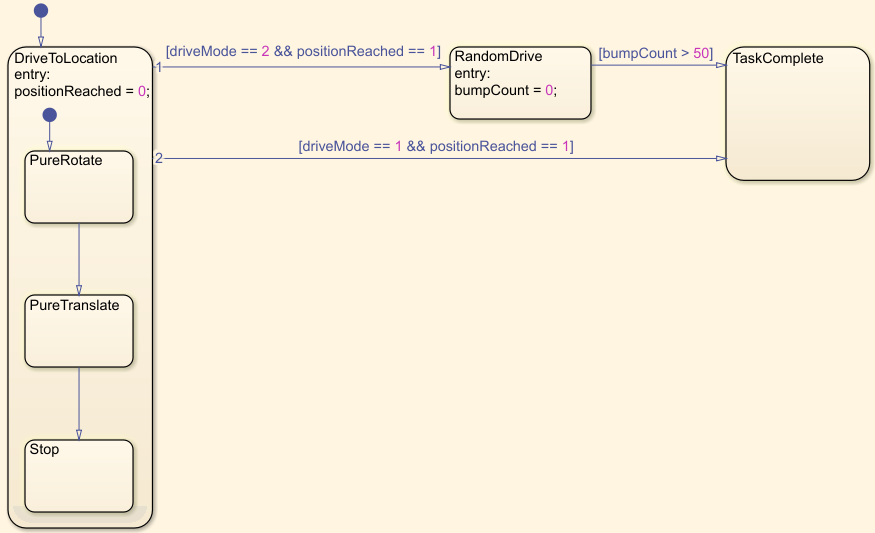

#### Task 12.

The "random drive" behavior consists of two actions: find the wall and rotate. During random driving, the robot repeatedly cycles through these actions.

Create states _FindWall_ and _RotateRandom_ as substates of _RandomDrive_, as well as the necessary transitions. _FindWall_ should be the default state for this level of hierarchy.

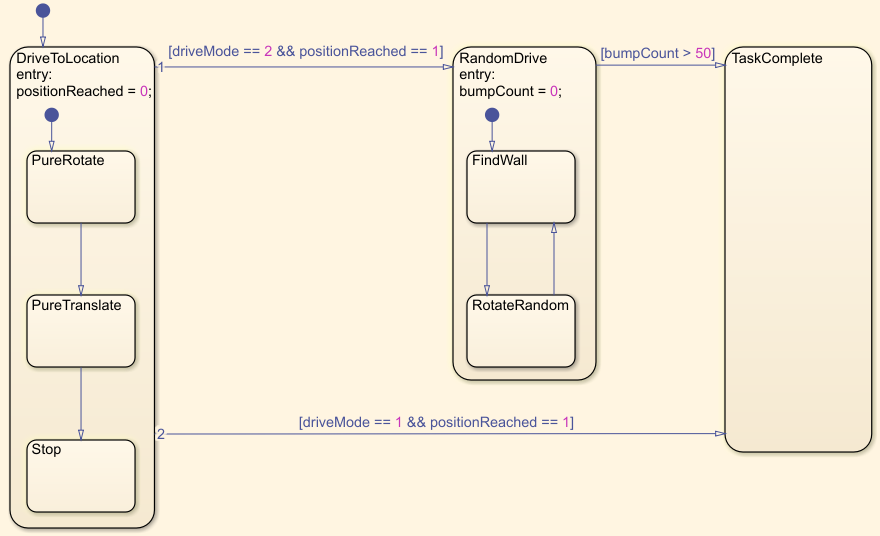

#### Task 13.

This chart will output the commands for velocity and angular velocity. These will be passed to the Simulink model of the robot. In pure rotation, you will set velocity, _v_, to 0 and angular velocity, _w_, to 1. In pure translation, v = 3 and w = 0. When stopped, both values should equal 0.

1. Add state entry actions to _PureRotate_, _PureTranslate_, and _Stop_ to set the appropriate values for _v_ and _w_ in each state. <br>
2. Define the scope of _v_ and _w_ so that they can be passed to the Simulink model. <br>
3. Add an _entry_ action to the _Stop_ state to set _positionReached_ to 1.

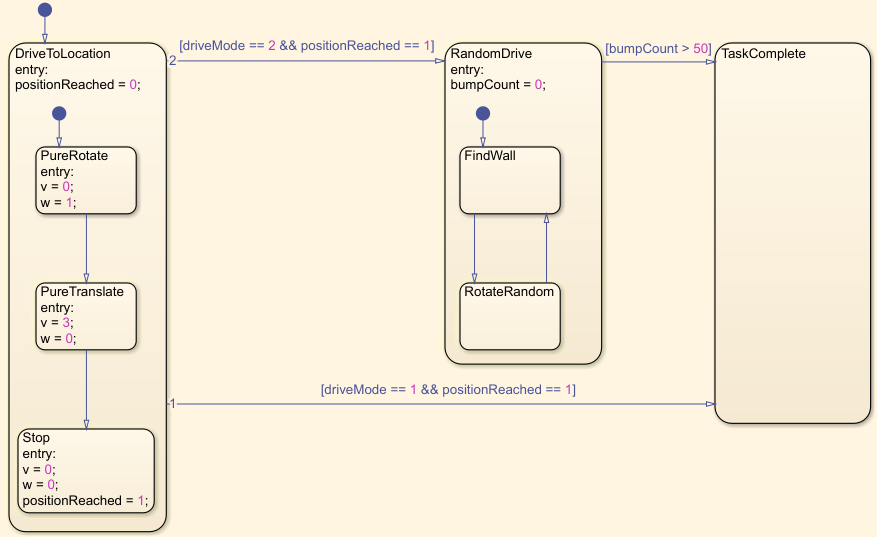

#### Task 14.

Four additional inputs from Simulink help track the robot's progress during a given behavior. <br>
_desiredDist_ – desired distance to destination <br>
_desiredRot_ – desired rotation to destination <br>
_elapsedDist_ – instantaneous elapsed distance <br>
_elapsedRot_ – instantaneous elapsed rotation <br>

These provide the conditions for transitioning between the DriveToLocation substates: as soon as the current rotation or distance meets or exceeds the target, the task is complete.

Add the conditions to the transitions between the _DriveToLocation_ substates. Set all of the new Symbols to Input Data.
 
Note: The elapsed rotation angle needs to be wrapped between 0 and 2π, so the value of interest is _mod(elapsedRot,2*pi)_.

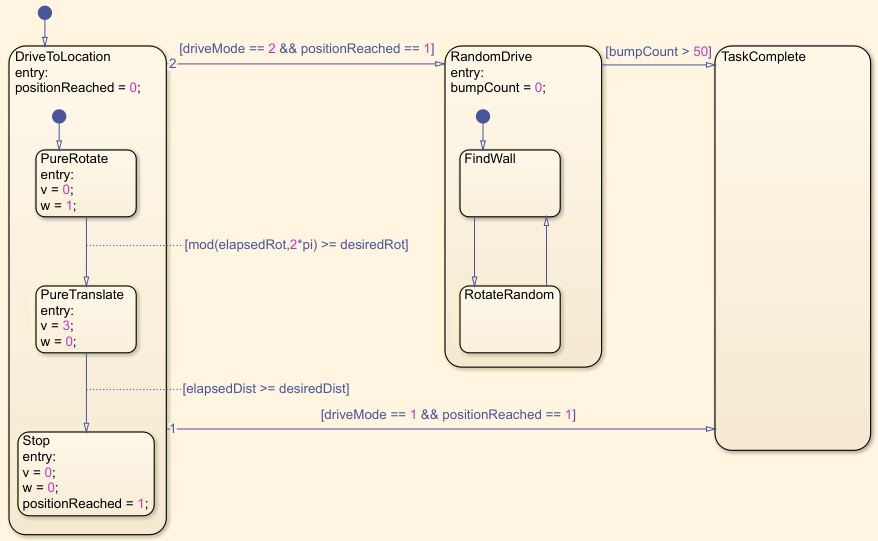

#### Task 15.

The _DriveToLocation_ behavior is now complete. The _RandomDrive_ behavior is similar, consisting of a pure translation while in _FindWall_ and a pure rotation in _RotateRandom_.

Add state entry actions to _FindWall_ and _RotateRandom_ to set the velocity, _v_, and angular velocity, _w_, in each state. Use the same values as the _PureTranslate_ and _PureRotate_ states.

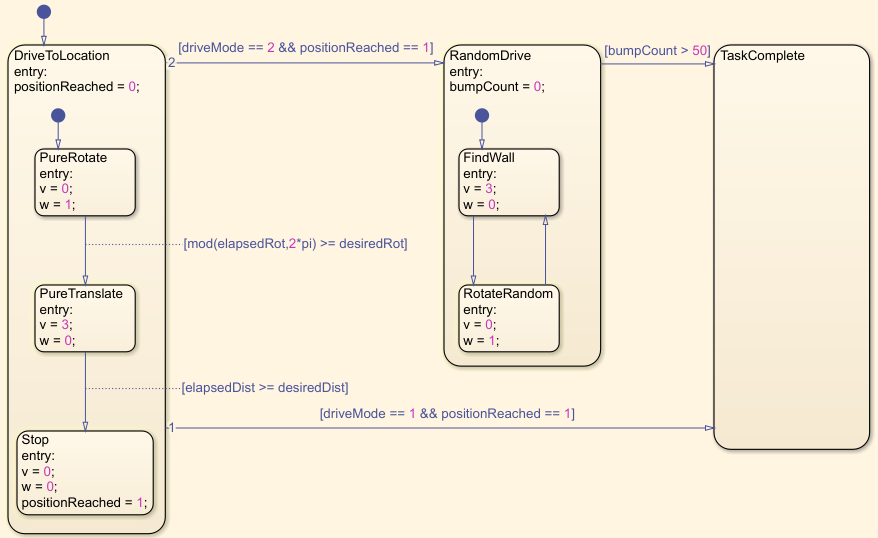

#### Task 16.

After bumping into a wall, the robot transitions to the random rotation behavior. This is detected by a bump sensor and recorded in the Simulink signal, _bump_. A value of 1 indicates a detection.

Add a condition on the transition from _FindWall_ to _RotateRandom_ such that the transition is valid when a bump is detected. Define _bump_ as Input Data.
 
Then, add a condition action that increments _bumpCount_ by 1 when the condition is true.

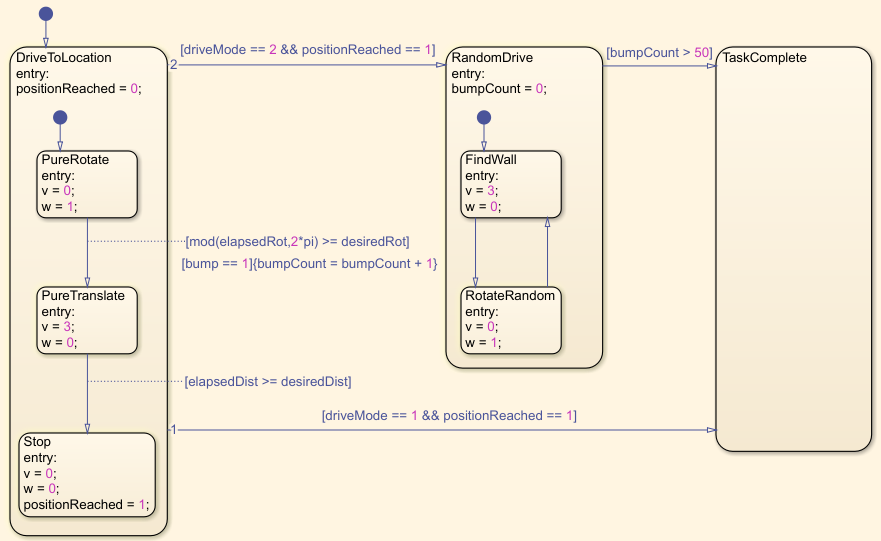

#### Task 17.

To achieve a random rotation, you can create a random variable, _tRotate_, that represents the amount of time to remain in the rotation state. You can then use this value as the argument in a temporal operator to determine when to transition back to the _FindWall_ state.

Add the following MATLAB command to the _RotateRandom_ entry action. The command generates a random number between 2.5 and 4.
 
tRotate = rand(1)*1.5+2.5;
 
Use _tRotate_ and a temporal operator to transition from _RotateRandom_ to _FindWall_ after 2.5-4 seconds. Remember to Resolve undefined symbols to define _tRotate_ as Local Data.

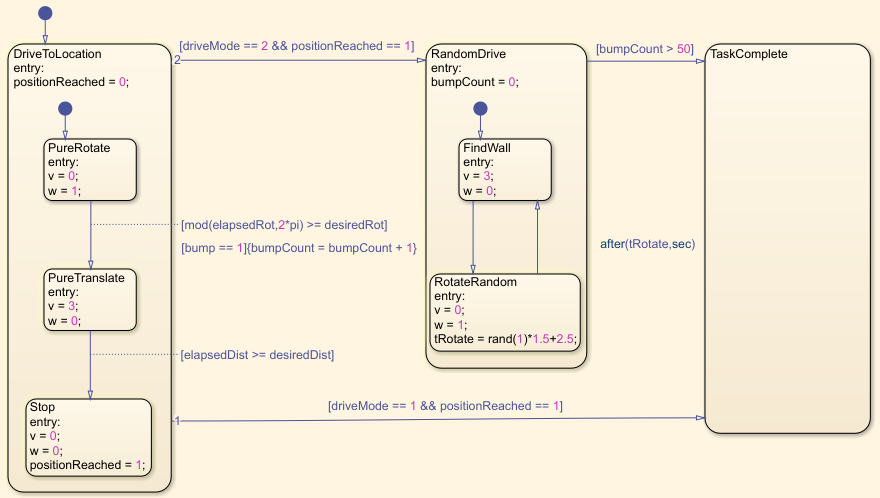

#### Task 18.

When a given drive mode task is complete, send a flag back to Simulink.

Set complete to 1 upon entering the _TaskComplete_ state. Define this as Output Data in the Symbols Pane.

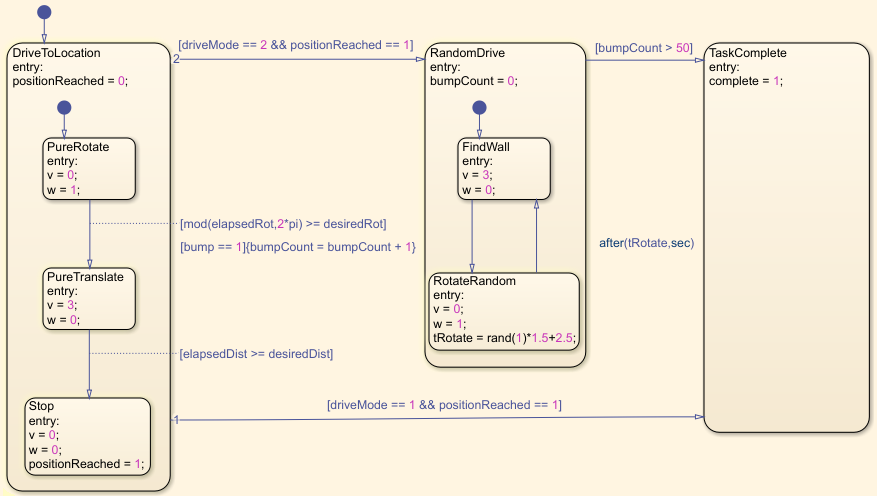

#### Task 19.

Navigate to Simulink and connect the unconnected signals with their corresponding ports on the Stateflow chart, based on the signal names.

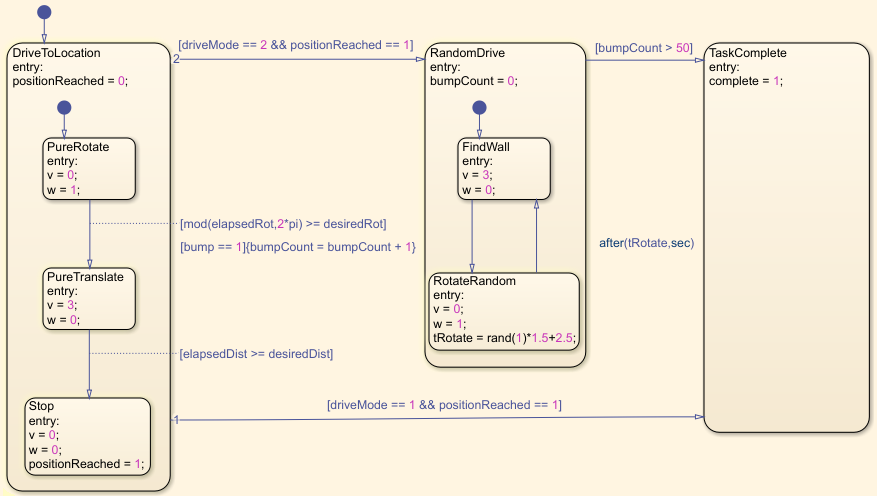

#### Task 20.

Finally, to uncross the signals, change the port order in the Stateflow chart.

Change the input port of bump to port 2, so the resulting input port order is as follows. <br>
1 – driveMode <br>
2 – bump <br>
3 – desiredDist <br>
4 – desiredRot <br>
5 – elapsedDist <br>
6 – elapsedRot

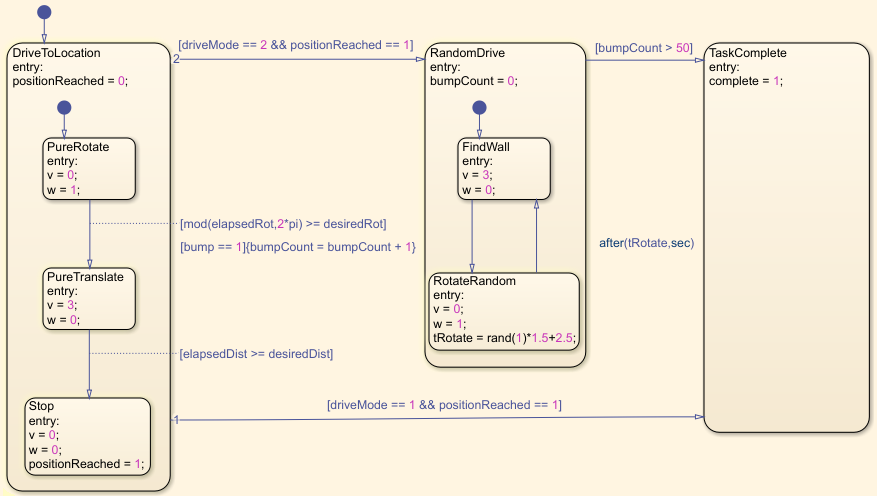